## Polynomial Linear Regression

In [31]:
## Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

%matplotlib inline

Text(0, 0.5, 'Y Dataset')

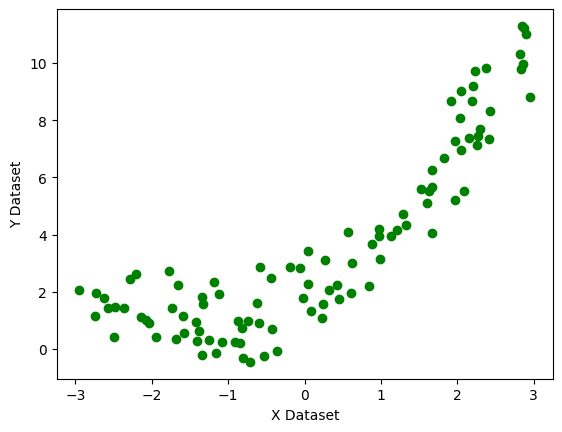

In [4]:
x = 6 * np.random.rand(100,1) - 3
y = 0.5 * x**2 + 1.5*x + 2 + np.random.randn(100,1)
## Quadritic Equation used y = 0.5x^2 + 1.5x + 2 + outliers

plt.scatter(x,y, color = 'g')
plt.xlabel('X Dataset')
plt.ylabel("Y Dataset")

In [ ]:
## Dividing the Data using Train Test Split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [9]:
## Lets Implement Simple Linear Regression
lr = LinearRegression()
lr.fit(x_train, y_train)

score = r2_score(y_test, lr.predict(x_test))
print(score)

0.8018950037417438


Text(0, 0.5, 'Y Dataset')

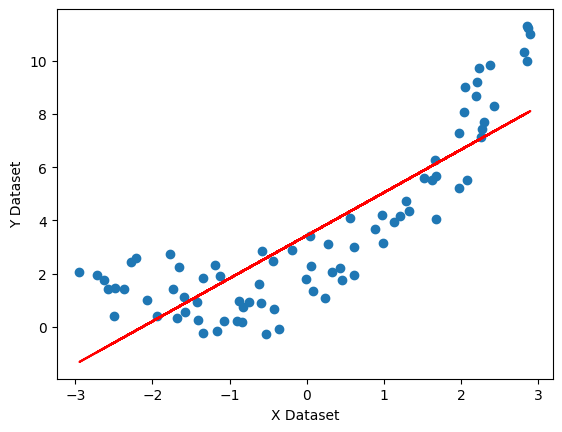

In [10]:
## Let's Visualize This Model
plt.plot(x_train, lr.predict(x_train), color = 'r')
plt.scatter(x_train, y_train)
plt.xlabel("X Dataset")
plt.ylabel("Y Dataset")

In [12]:
## Lets apply Polynomial transformation
poly = PolynomialFeatures(degree=2, include_bias=True)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

In [13]:
lr1 = LinearRegression()
lr1.fit(x_train_poly, y_train)
y_pred = lr1.predict(x_test_poly)
score1 = r2_score(y_test, y_pred)
print(score1)

0.9024812355865868


In [14]:
print(lr1.coef_)

[[0.         1.47843314 0.57760099]]


In [15]:
print(lr1.intercept_)

[1.80490361]


Text(0, 0.5, 'Y Dataset')

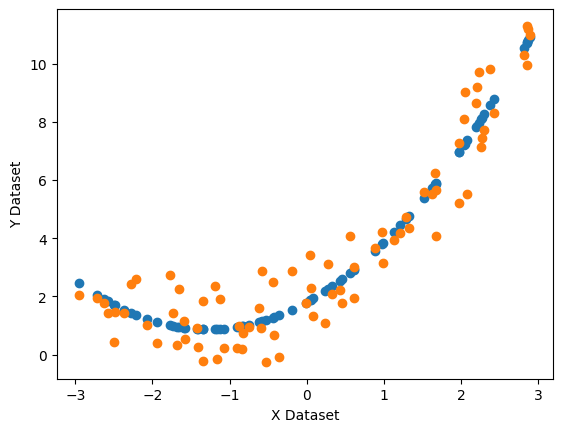

In [19]:
## Let's Visualize This Model
# plt.plot(x_train_poly, y_pred, color = 'r')
plt.scatter(x_train, lr1.predict(x_train_poly))
plt.scatter(x_train, y_train)
plt.xlabel("X Dataset")
plt.ylabel("Y Dataset")

In [25]:
## If the Degree is '3'
poly = PolynomialFeatures(degree=3, include_bias=True)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

In [26]:
x_train_poly

array([[ 1.00000000e+00,  1.62660812e+00,  2.64585399e+00,
         4.30376760e+00],
       [ 1.00000000e+00,  2.42437277e+00,  5.87758335e+00,
         1.42494531e+01],
       [ 1.00000000e+00,  2.30365721e-01,  5.30683653e-02,
         1.22251322e-02],
       [ 1.00000000e+00, -5.96534649e-01,  3.55853587e-01,
        -2.12278995e-01],
       [ 1.00000000e+00,  1.66782215e+00,  2.78163073e+00,
         4.63926534e+00],
       [ 1.00000000e+00, -1.66840130e-02,  2.78356291e-04,
        -4.64409998e-06],
       [ 1.00000000e+00, -2.57596172e+00,  6.63557877e+00,
        -1.70929969e+01],
       [ 1.00000000e+00,  9.89511872e-01,  9.79133745e-01,
         9.68864466e-01],
       [ 1.00000000e+00,  2.89680134e+00,  8.39145799e+00,
         2.43083867e+01],
       [ 1.00000000e+00,  1.66759079e+00,  2.78085904e+00,
         4.63733492e+00],
       [ 1.00000000e+00,  1.52214581e+00,  2.31692786e+00,
         3.52670203e+00],
       [ 1.00000000e+00, -9.08792052e-01,  8.25902993e-01,
      

In [27]:
lr1 = LinearRegression()
lr1.fit(x_train_poly, y_train)
y_pred = lr1.predict(x_test_poly)
score1 = r2_score(y_test, y_pred)
print(score1)

0.8943511062290921


In [28]:
## Prediction of New Data
x_new = np.linspace(-3,3,200).reshape(200,1)
x_new_poly = poly.transform(x_new)
x_new_poly

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00,
        -2.70000000e+01],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00,
        -2.61940839e+01],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00,
        -2.54043665e+01],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00,
        -2.46306834e+01],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00,
        -2.38728702e+01],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00,
        -2.31307624e+01],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00,
        -2.24041955e+01],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00,
        -2.16930052e+01],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00,
        -2.09970269e+01],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00,
        -2.03160961e+01],
       [ 1.00000000e+00, -2.69849246e+00,  7.28186157e+00,
        -1.96500486e+01],
       [ 1.00000000e+00, -2.66834171e+00,  7.12004747e+00,
      

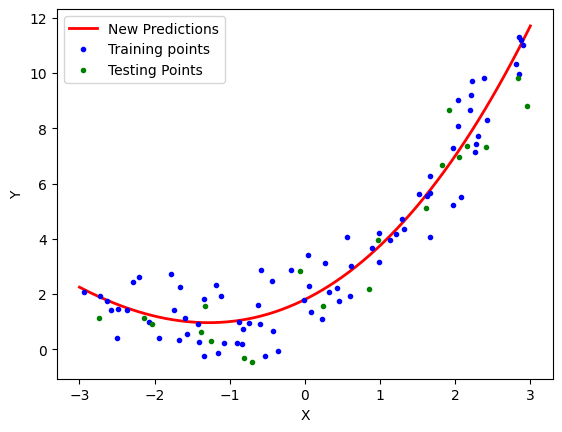

In [30]:
y_new = lr1.predict(x_new_poly)
plt.plot(x_new, y_new, "r-", linewidth = 2, label = "New Predictions")
plt.plot(x_train, y_train, "b.", label = "Training points")
plt.plot(x_test, y_test, "g.", label = "Testing Points")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

In [36]:
def poly_regression(degree):
    x_new = np.linspace(-3, 3, 200).reshape(200, 1)

    poly_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=degree, include_bias=True)),
        ("lin_reg", LinearRegression())
    ])

    # Fit model
    poly_regression.fit(x_train, y_train)

    # Predict
    y_pred_new = poly_regression.predict(x_new)

    # Plot
    plt.plot(x_new, y_pred_new, "r-", linewidth=2, label=f"Degree {degree}")
    plt.plot(x_train, y_train, "b.", linewidth=3)
    plt.plot(x_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.axis([-4, 4, 0, 10])
    plt.show()


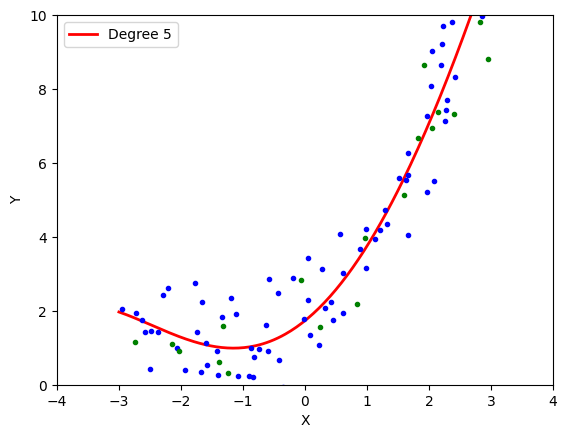

In [43]:
poly_regression(5)